Done. You have the matrices PP QQ  RR  SS  WW.
 
PP
(7, 7)
[[-0.2631 -0.1584  0.0097  0.2793 -0.     -0.     -0.    ]
 [ 1.      0.     -0.      0.      0.      0.      0.    ]
 [ 0.      1.     -0.     -0.      0.     -0.      0.    ]
 [-0.     -0.      1.      0.     -0.     -0.     -0.    ]
 [-0.1553 -0.1386 -0.1119 -0.0689  0.      0.      0.    ]
 [-0.0978 -0.0873 -0.0704 -0.0434  0.      0.      0.    ]
 [-0.0615 -0.0549 -0.0443 -0.0273  0.      0.      0.    ]]
 
RR
(7, 7)
[[ 0.1411  0.1259  0.1016  0.0626  0.      0.      0.    ]
 [-0.0008  0.0261  0.0693  0.1387 -0.     -0.     -0.    ]
 [ 0.25    0.25    0.25    0.25   -0.     -0.     -0.    ]
 [-0.1419 -0.0998 -0.0323  0.0761 -0.     -0.     -0.    ]
 [-0.1411 -0.1259 -0.1016 -0.0626 -0.     -0.     -0.    ]
 [-0.3919 -0.3498 -0.2823 -0.1739 -0.     -0.     -0.    ]
 [-0.2467 -0.2202 -0.1777 -0.1095 -0.     -0.     -0.    ]]
 
QQ
(7, 1)
[[ 1.8456]
 [-0.    ]
 [-0.    ]
 [-0.    ]
 [-0.8358]
 [-1.0806]
 [-1.207 ]]
 
SS
(7, 1)

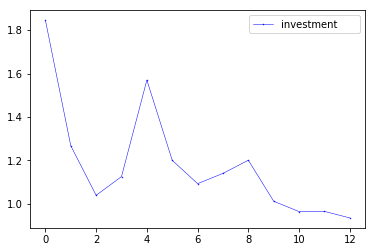

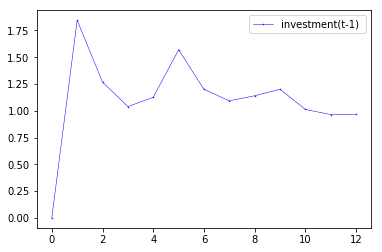

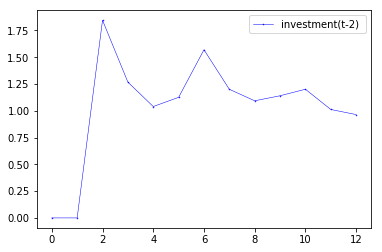

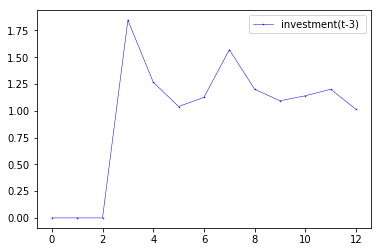

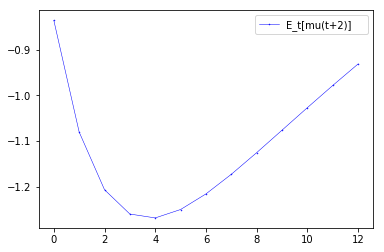

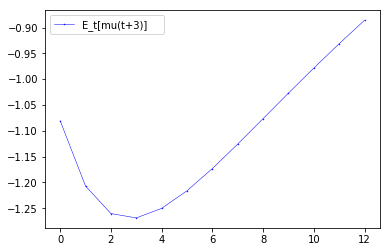

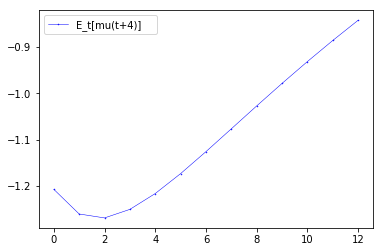

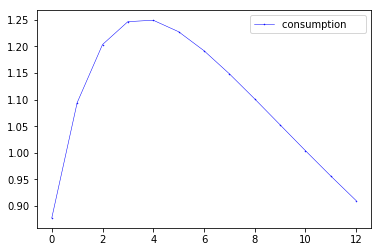

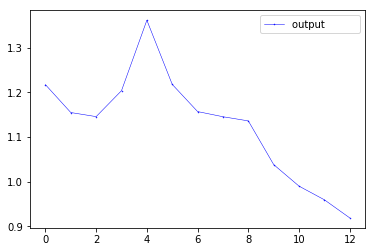

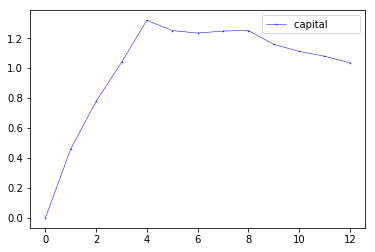

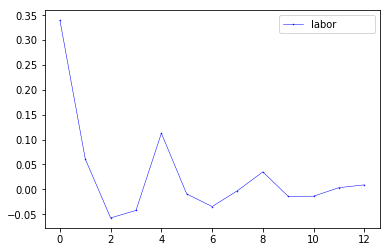

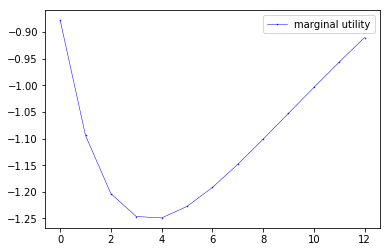

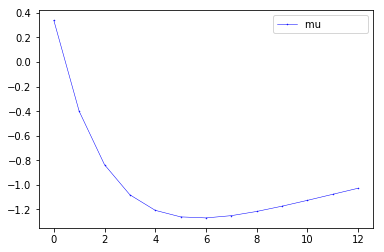

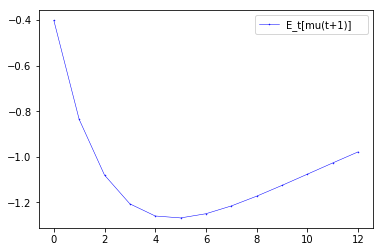

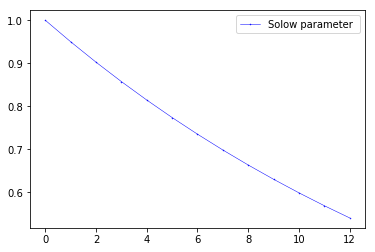

Set of Impulse Responses
x-axis: time periods,  y-axis:  %-deviation from steady state


In [2]:
#  Uhlig's Exampl3.m
#  G. Hansen Indivisible Labor and Business Cycle (JME, 1985)
#   RBC Model with Time-to-Decay and Echo Effects

import numpy as np

N_bar     = 1.0/3
Z_bar     = 1
rho       = .36
R_bar     = 1.01
eta       = 1.0
psi       = .95
sigma_sigma = .712
p_echo    = 4

betta   = 1.0/R_bar
YK_bar  = (1- betta)/((1 - betta**p_echo)*betta*rho)
K_bar   = (YK_bar / Z_bar)**(1.0/(rho-1)) * N_bar
I_bar   = K_bar / p_echo
Y_bar   = YK_bar * K_bar
C_bar   = Y_bar - I_bar
Lam_bar = C_bar**(- eta)
Mu_bar  = rho*Lam_bar*YK_bar
A       = Lam_bar * (1 - rho) * Y_bar/N_bar


VARNAMES = ['investment      ',
            'investment(t-1) ',
            'investment(t-2) ',
            'investment(t-3) ',
            'E_t[mu(t+2)]    ',
            'E_t[mu(t+3)]    ',
            'E_t[mu(t+4)]    ',
            'consumption     ',
            'output          ',
            'capital         ',
            'labor           ',
            'marginal utility',
            'mu              ',
            'E_t[mu(t+1)]    ',
            'Solow parameter ']

AA = np.vstack(([ -I_bar, 0, 0, 0, 0, 0, 0], 
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, betta**2, betta**3, betta**4], 
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 1, 0, 0, 0, 0, 0],   
                          [0, 0, 1, 0, 0, 0, 0],   
                          [0, 0, 0, 1, 0, 0, 0]))


BB = np.vstack(([0, 0, 0, 0, 0, 0, 0], 
                          [1, 1, 1, 1, 0, 0, 0],  
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],  
                          [0, 0, 0, 0, 0, 0, 0], 
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],  
                         [-1, 0, 0, 0, 0, 0, 0],  
                          [0,-1, 0, 0, 0, 0, 0],   
                          [0, 0,-1, 0, 0, 0, 0]))

CC = np.vstack(([ -C_bar, Y_bar, 0, 0, 0, 0, 0],
                         [0, 0,-p_echo, 0, 0, 0, 0], 
                         [0, -1, rho, (1-rho), 0, 0, 0],            
                         [0, 1, 0, -1, 1, 0,  0],    
                         [0, 0, 0, 0, (-Lam_bar/Mu_bar), 0, betta],           
                         [0, 1, -1, 0, 1, -1, 0],
                         [eta, 0, 0, 0, 1, 0, 0],    
                         [0, 0, 0, 0, 0, 0, 0],         
                         [0, 0, 0, 0, 0, 0, 0],        
                         [0, 0, 0, 0, 0, 0, 0] ))   

DD = np.vstack(([0],
           [0],
           [1],
           [0],
           [0],
           [0],
           [0],
           [0],
           [0],
           [0]))

FF = np.vstack(([0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, -1, 0, 0],
                          [0, 0, 0, 0, 0,-1, 0]))

GG = np.vstack(([0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 0, 1, 0],
                          [0, 0, 0, 0, 0, 0, 1]))

HH = np.vstack(([0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0]))

JJ = np.vstack(([0, 0, 0, 0, 0, -1, 0],
                          [0, 0, 0, 0, 0, 0, -1],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0]))

KK = np.vstack(([0, 0, 0, 0, 0, 0, 1],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0]))

LL = np.vstack(([0],
                          [0],
                          [0],
                          [0]))

MM = np.vstack(([0],
                          [0],
                          [0],
                          [0]))

NN = [psi]

Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

print(' ')
print('PP')
print(PP.shape)
print(PP)
print(' ')
print('RR')
print(RR.shape)
print(RR)
print(' ')
print('QQ')
print(QQ.shape)
print(QQ)
print(' ')
print('SS')
print(SS.shape)
print(SS)
print(' ')


%run Uhlig_impulse_resp_all.ipynb

%run Uhlig_plot_impresp_all.ipynb
